In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer,  make_column_selector as selector
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score, plot_roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImPipeline

In [2]:
df = pd.read_csv('../Data/train_banking.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df['made_deposit'] = df.y

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   contact       45211 non-null  object
 9   day           45211 non-null  int64 
 10  month         45211 non-null  object
 11  duration      45211 non-null  int64 
 12  campaign      45211 non-null  int64 
 13  pdays         45211 non-null  int64 
 14  previous      45211 non-null  int64 
 15  poutcome      45211 non-null  object
 16  y             45211 non-null  object
 17  made_deposit  45211 non-null  object
dtypes: int64(7), object(11)
memory usage: 6.2+ MB


In [6]:
df = df.drop('y', axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   contact       45211 non-null  object
 9   day           45211 non-null  int64 
 10  month         45211 non-null  object
 11  duration      45211 non-null  int64 
 12  campaign      45211 non-null  int64 
 13  pdays         45211 non-null  int64 
 14  previous      45211 non-null  int64 
 15  poutcome      45211 non-null  object
 16  made_deposit  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.made_deposit.value_counts()

no     39922
yes     5289
Name: made_deposit, dtype: int64

In [9]:
df["made_deposit_binary"] = df["made_deposit"].replace({"no":0,"yes":1})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   job                  45211 non-null  object
 2   marital              45211 non-null  object
 3   education            45211 non-null  object
 4   default              45211 non-null  object
 5   balance              45211 non-null  int64 
 6   housing              45211 non-null  object
 7   loan                 45211 non-null  object
 8   contact              45211 non-null  object
 9   day                  45211 non-null  int64 
 10  month                45211 non-null  object
 11  duration             45211 non-null  int64 
 12  campaign             45211 non-null  int64 
 13  pdays                45211 non-null  int64 
 14  previous             45211 non-null  int64 
 15  poutcome             45211 non-null  object
 16  made

In [11]:
df.made_deposit_binary.value_counts()

0    39922
1     5289
Name: made_deposit_binary, dtype: int64

In [12]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,made_deposit_binary
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [13]:
# Checking for null values; we can see there are none
df.isna().sum()
print ("This dataset contains %d null values." % df.isna().sum().sum())

This dataset contains 0 null values.


In [14]:
df.made_deposit.value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: made_deposit, dtype: float64

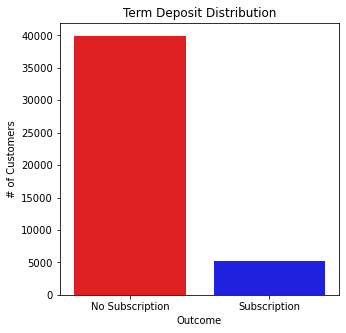

In [15]:
# Checking the distribution of the target variable, 'made_deposit'
deposit = df["made_deposit"].value_counts()

plt.figure(figsize=(5,5))
ax = sns.barplot(x = deposit.index, y = deposit.values, palette={'no':"red", 'yes':"blue"})
ax.set(xlabel='Outcome', ylabel='# of Customers', title = 'Term Deposit Distribution')
ax.set_xticklabels(["No Subscription", "Subscription"])
plt.show()

In [16]:
# Calculating deposit rate
deposit_rate = df.made_deposit.value_counts(normalize=True)
print("deposit_rate is %.2f%%." % (deposit_rate[1] * 100))

deposit_rate is 11.70%.


In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,made_deposit,made_deposit_binary
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


<AxesSubplot:>

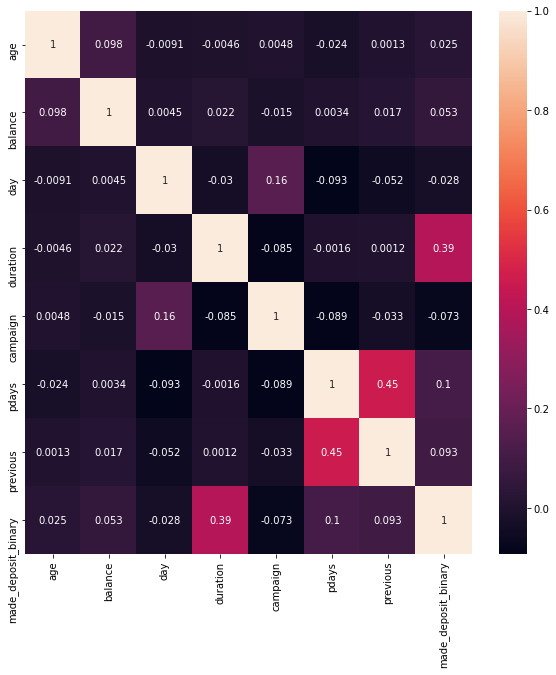

In [18]:
# Check for high correlation between features

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

In [19]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

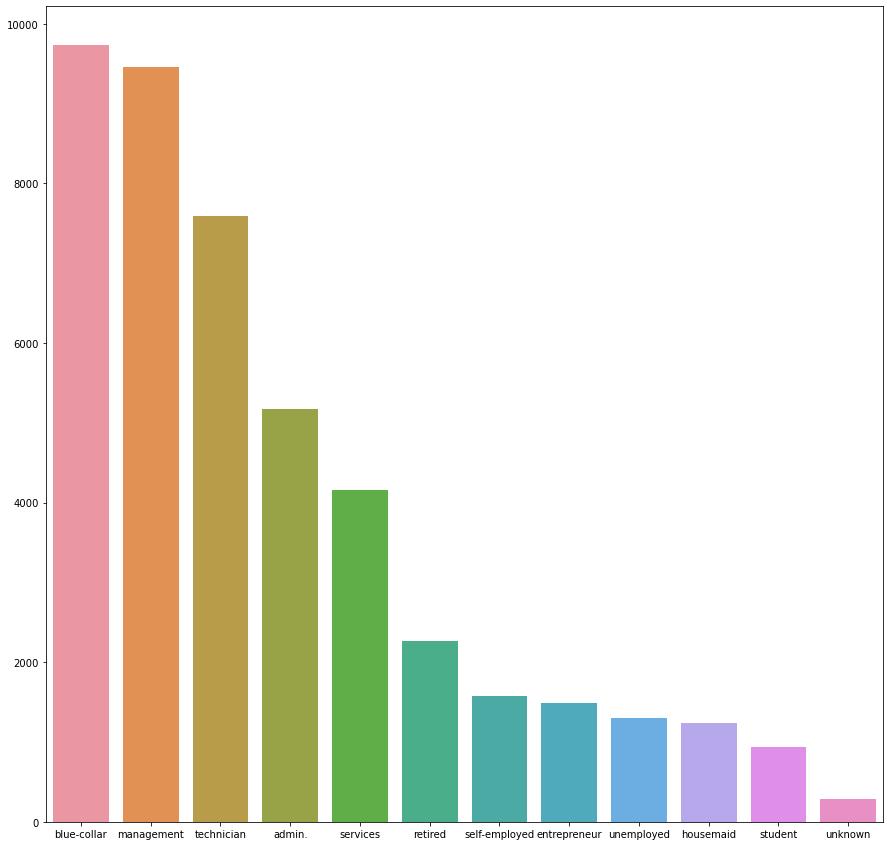

In [20]:
job_count = df["job"].value_counts()

plt.figure(figsize=(15,15))
ax = sns.barplot(x = job_count.index, y = job_count.values)
#ax.set(xlabel='made deposit', ylabel='# of samples', title = 'Deposit Distribution')
#ax.set_xticklabels(["no deposit", "made deposit"])
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   job                  45211 non-null  object
 2   marital              45211 non-null  object
 3   education            45211 non-null  object
 4   default              45211 non-null  object
 5   balance              45211 non-null  int64 
 6   housing              45211 non-null  object
 7   loan                 45211 non-null  object
 8   contact              45211 non-null  object
 9   day                  45211 non-null  int64 
 10  month                45211 non-null  object
 11  duration             45211 non-null  int64 
 12  campaign             45211 non-null  int64 
 13  pdays                45211 non-null  int64 
 14  previous             45211 non-null  int64 
 15  poutcome             45211 non-null  object
 16  made

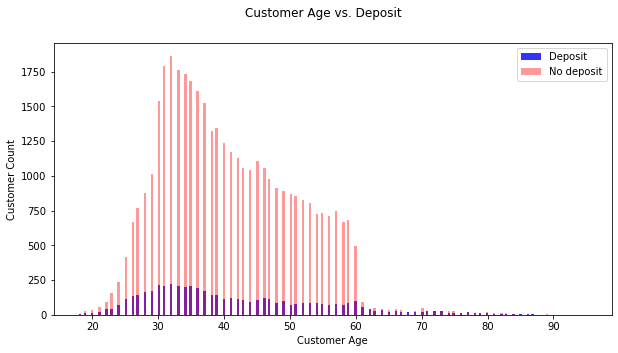

In [22]:
# Histogram of 'age' vs. 'made_deposit'
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(df[df["made_deposit"]=='yes']["age"], bins=int(np.sqrt(len(df))), alpha=0.8, color="blue", label="Deposit")
ax.hist(df[df["made_deposit"]=='no']["age"], bins=int(np.sqrt(len(df))), alpha=0.4, color="red", label="No deposit")

ax.set_xlabel("Customer Age")
ax.set_ylabel("Customer Count")

fig.suptitle("Customer Age vs. Deposit")

ax.legend();



In [23]:
df.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

I want to bin by age range before further exploring the relationship between age and term deposits. I will create 3 age ranges to represent different stages of life: early, middle, and late. 

In [24]:
df_age_groups = df.copy()

In [25]:
df_age_groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   job                  45211 non-null  object
 2   marital              45211 non-null  object
 3   education            45211 non-null  object
 4   default              45211 non-null  object
 5   balance              45211 non-null  int64 
 6   housing              45211 non-null  object
 7   loan                 45211 non-null  object
 8   contact              45211 non-null  object
 9   day                  45211 non-null  int64 
 10  month                45211 non-null  object
 11  duration             45211 non-null  int64 
 12  campaign             45211 non-null  int64 
 13  pdays                45211 non-null  int64 
 14  previous             45211 non-null  int64 
 15  poutcome             45211 non-null  object
 16  made

In [26]:
df_age_groups['age_range_2'] = pd.cut(df_age_groups['age'], bins= [0, 30, 60, 90], include_lowest=True,
                                    labels = ['0-30', '30-60', '60-90'])

In [27]:
df_age_groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  45211 non-null  int64   
 1   job                  45211 non-null  object  
 2   marital              45211 non-null  object  
 3   education            45211 non-null  object  
 4   default              45211 non-null  object  
 5   balance              45211 non-null  int64   
 6   housing              45211 non-null  object  
 7   loan                 45211 non-null  object  
 8   contact              45211 non-null  object  
 9   day                  45211 non-null  int64   
 10  month                45211 non-null  object  
 11  duration             45211 non-null  int64   
 12  campaign             45211 non-null  int64   
 13  pdays                45211 non-null  int64   
 14  previous             45211 non-null  int64   
 15  poutcome           

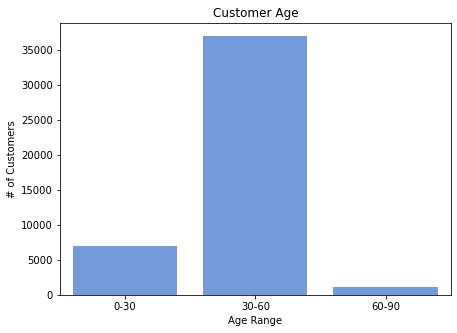

In [28]:
age_range_count_2 = df_age_groups["age_range_2"].value_counts()

plt.figure(figsize=(7,5))
ax = sns.barplot(x = age_range_count_2.index, y = age_range_count_2.values, color = "cornflowerblue")
ax.set(xlabel='Age Range', ylabel='# of Customers', title = 'Customer Age')
#ax.set_xticklabels(["no deposit", "made deposit"])

plt.show()

In [29]:
df_age_groups.age_range_2.value_counts(normalize=True)*100

30-60    81.835678
0-30     15.551721
60-90     2.612601
Name: age_range_2, dtype: float64

The young age group represents 15.5% of the dataset, middle aged group 81.8%, and old age group 2.6%. Let's now compare the subscription rate between the 3 groups. 

Text(0.5, 0.98, 'Term Deposit Subscription by Age Range')

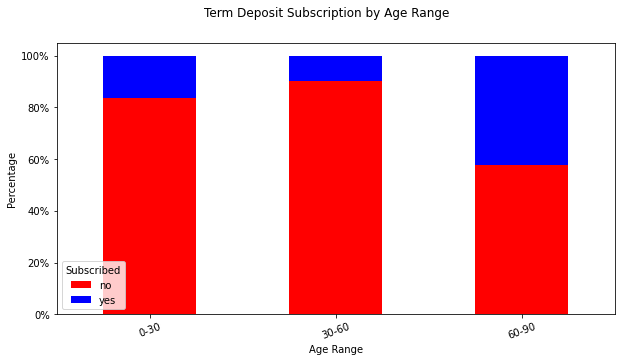

In [30]:
age_counts_2_df = df_age_groups.groupby(["made_deposit", "age_range_2"])["age_range_2"].count().unstack()


deposit_percents_2_df = age_counts_2_df.div(age_counts_2_df.sum()).T
fig, ax = plt.subplots()

deposit_percents_2_df.plot(kind="bar", stacked=True, color=["red", "blue"], ax=ax, figsize=(10,5))

ax.legend(title="Subscribed", loc='lower left')
ax.set_xlabel("Age Range")
ax.set_ylabel("Percentage")
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))


fig.suptitle("Term Deposit Subscription by Age Range")

In [31]:
deposit_percents_2_df.value_counts()*100

no        yes     
0.901549  0.098451    100
0.837127  0.162873    100
0.579170  0.420830    100
dtype: int64

For the young age group of 0-30 years old,  subscription rate is about 16%, then it drops to about 10% for the middle age 30-60 group, and then we can see in the older 60-90 age group, the sign up rate increases drastically to 42%. This could present a few opportunities for target marketing and special promotions. One reccommendation could be to... 


In [32]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

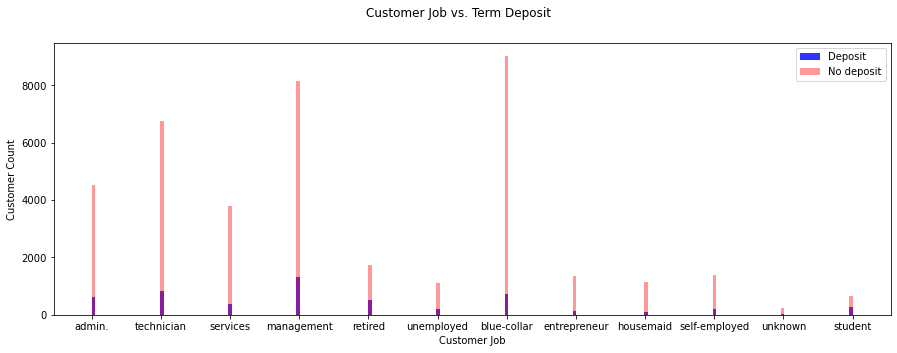

In [33]:
# Histogram of 'job' vs. 'made_deposit'
fig, ax = plt.subplots(figsize=(15,5))

ax.hist(df[df["made_deposit"]=='yes']["job"], bins=int(np.sqrt(len(df))), alpha=0.8, color="blue", label="Deposit")
ax.hist(df[df["made_deposit"]=='no']["job"], bins=int(np.sqrt(len(df))), alpha=0.4, color="red", label="No deposit")

ax.set_xlabel("Customer Job")
ax.set_ylabel("Customer Count")

fig.suptitle("Customer Job vs. Term Deposit")

ax.legend();

Text(0.5, 0.98, 'Term Deposit Subscription by Job Type')

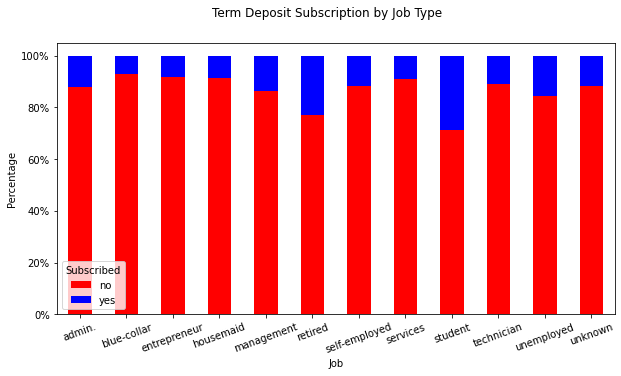

In [34]:
job_counts_df = df.groupby(["made_deposit", "job"])["job"].count().unstack()


deposit_percents_df = job_counts_df.div(job_counts_df.sum()).T
fig, ax = plt.subplots()

deposit_percents_df.plot(kind="bar", stacked=True, color=["red", "blue"], ax=ax, figsize=(10,5))

ax.legend(title="Subscribed", loc='lower left')
ax.set_xlabel("Job")
ax.set_ylabel("Percentage")
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))


fig.suptitle("Term Deposit Subscription by Job Type")


This chart shows the 2 highest groups that represent deposits are retirees and students. This supports the finding in the age range plot about the 10-30 and 60-100 age range groups representing a higher percentage of deposits.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   job                  45211 non-null  object
 2   marital              45211 non-null  object
 3   education            45211 non-null  object
 4   default              45211 non-null  object
 5   balance              45211 non-null  int64 
 6   housing              45211 non-null  object
 7   loan                 45211 non-null  object
 8   contact              45211 non-null  object
 9   day                  45211 non-null  int64 
 10  month                45211 non-null  object
 11  duration             45211 non-null  int64 
 12  campaign             45211 non-null  int64 
 13  pdays                45211 non-null  int64 
 14  previous             45211 non-null  int64 
 15  poutcome             45211 non-null  object
 16  made

In [36]:
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Text(0.5, 0.98, 'Deposits by Marital Status')

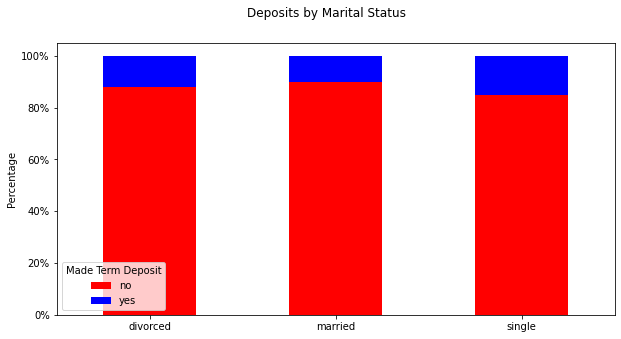

In [37]:
marital_counts_df = df.groupby(["made_deposit", "marital"])["marital"].count().unstack()


deposit_percents_df = marital_counts_df.div(marital_counts_df.sum()).T
fig, ax = plt.subplots()

deposit_percents_df.plot(kind="bar", stacked=True, color=["red", "blue"], ax=ax, figsize=(10,5))

ax.legend(title="Made Term Deposit", loc='lower left')
ax.set_xlabel("")
ax.set_ylabel("Percentage")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))


fig.suptitle("Deposits by Marital Status")

In [38]:
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Text(0.5, 0.98, 'Deposits by Education Status')

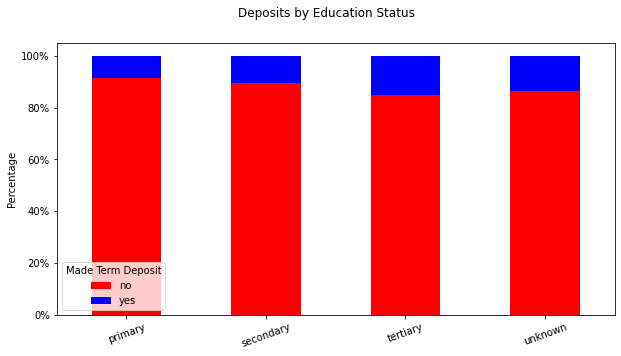

In [39]:
education_counts_df = df.groupby(["made_deposit", "education"])["education"].count().unstack()


deposit_percents_df = education_counts_df.div(education_counts_df.sum()).T
fig, ax = plt.subplots()

deposit_percents_df.plot(kind="bar", stacked=True, color=["red", "blue"], ax=ax, figsize=(10,5))

ax.legend(title="Made Term Deposit", loc='lower left')
ax.set_xlabel("")
ax.set_ylabel("Percentage")
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))


fig.suptitle("Deposits by Education Status")

In [40]:
df.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

Text(0.5, 0.98, 'Deposits by Default Status')

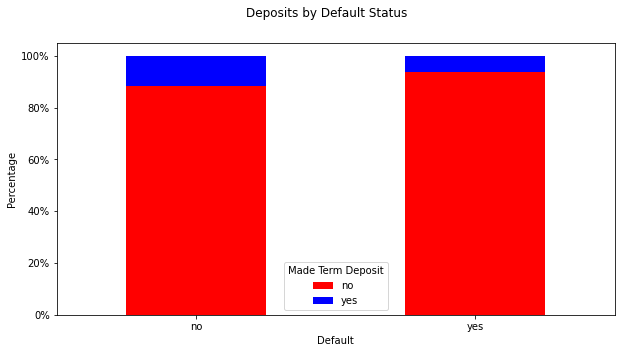

In [41]:
default_counts_df = df.groupby(["made_deposit", "default"])["default"].count().unstack()


deposit_percents_df = default_counts_df.div(default_counts_df.sum()).T
fig, ax = plt.subplots()

deposit_percents_df.plot(kind="bar", stacked=True, color=["red", "blue"], ax=ax, figsize=(10,5))

ax.legend(title="Made Term Deposit", loc='lower center')
ax.set_xlabel("Default")
ax.set_ylabel("Percentage")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))


fig.suptitle("Deposits by Default Status")

In [42]:
df.balance.value_counts()

0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64

In [43]:
#balance_counts_df = df.groupby(["made_deposit", "balance"])["balance"].count().unstack()


#deposit_percents_df = balance_counts_df.div(balance_counts_df.sum()).T
#fig, ax = plt.subplots()

#deposit_percents_df.plot(kind="bar", stacked=True, color=["red", "blue"], ax=ax, figsize=(10,5))

#ax.legend(title="Made Deposit", loc='lower left')
#ax.set_xlabel("Balance")
#ax.set_ylabel("Percentage")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
#ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))


#fig.suptitle("Deposits by Balance")

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   job                  45211 non-null  object
 2   marital              45211 non-null  object
 3   education            45211 non-null  object
 4   default              45211 non-null  object
 5   balance              45211 non-null  int64 
 6   housing              45211 non-null  object
 7   loan                 45211 non-null  object
 8   contact              45211 non-null  object
 9   day                  45211 non-null  int64 
 10  month                45211 non-null  object
 11  duration             45211 non-null  int64 
 12  campaign             45211 non-null  int64 
 13  pdays                45211 non-null  int64 
 14  previous             45211 non-null  int64 
 15  poutcome             45211 non-null  object
 16  made

In [45]:
df.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

Text(0.5, 0.98, 'Term Deposit Subscription by Mortgage Status')

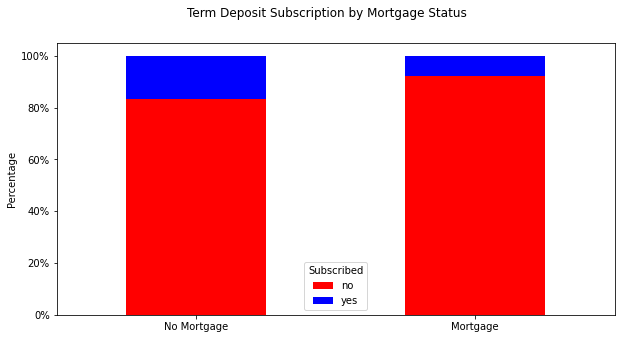

In [46]:
housing_counts_df = df.groupby(["made_deposit", "housing"])["housing"].count().unstack()


deposit_percents_df = housing_counts_df.div(housing_counts_df.sum()).T
fig, ax = plt.subplots()

deposit_percents_df.plot(kind="bar", stacked=True, color=["red", "blue"], ax=ax, figsize=(10,5))

ax.legend(title="Subscribed", loc='lower center')
ax.set_xlabel("")
ax.set_ylabel("Percentage")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xticklabels(["No Mortgage", "Mortgage"], rotation=0)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))


fig.suptitle("Term Deposit Subscription by Mortgage Status")


In [47]:
deposit_percents_df.value_counts(normalize=True)

no        yes     
0.923000  0.077000    0.5
0.832976  0.167024    0.5
dtype: float64

People who had a mortgage were less likely to make a term deposit. It is possible they needed the money to service their loans and could not afford or were not willing to lock up capital for an extended period of time in a term deposit. 

In [48]:
df.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

Text(0.5, 0.98, 'Deposits by Loan Status')

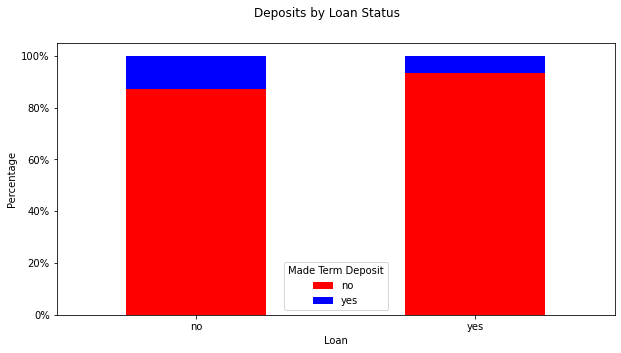

In [49]:
loan_counts_df = df.groupby(["made_deposit", "loan"])["loan"].count().unstack()


deposit_percents_df = loan_counts_df.div(loan_counts_df.sum()).T
fig, ax = plt.subplots()

deposit_percents_df.plot(kind="bar", stacked=True, color=["red", "blue"], ax=ax, figsize=(10,5))

ax.legend(title="Made Term Deposit", loc='lower center')
ax.set_xlabel("Loan")
ax.set_ylabel("Percentage")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))


fig.suptitle("Deposits by Loan Status")

Similar to mortgages, customers with personal loans were less likely to make a term deposit.

In [50]:
loan_counts_df.head()

loan,no,yes
made_deposit,,
no,33162,6760
yes,4805,484


In [51]:
deposit_percents_df.head()

made_deposit,no,yes
loan,,
no,0.873443,0.126557
yes,0.933186,0.066814


In [52]:
# Visualziing distribution of numeric data with pairplot
#numeric_columns = df.select_dtypes(include = np.number)
#sns.pairplot(numeric_columns)

In [53]:
df.day.value_counts(ascending=True)

1      322
24     447
10     524
31     643
25     840
22     905
23     939
26    1035
3     1079
27    1121
2     1293
16    1415
4     1445
11    1479
9     1561
30    1566
13    1585
12    1603
15    1703
29    1745
19    1757
7     1817
28    1830
8     1842
14    1848
5     1910
6     1932
17    1939
21    2026
18    2308
20    2752
Name: day, dtype: int64

In [54]:
df.pdays.value_counts(ascending=True)

 32         1
 493        1
 589        1
 717        1
 749        1
        ...  
 91       126
 183      126
 92       147
 182      167
-1      36954
Name: pdays, Length: 559, dtype: int64

In [55]:
df.previous.value_counts(ascending=True)

275        1
32         1
41         1
51         1
58         1
35         1
40         1
55         1
38         2
37         2
26         2
28         2
30         3
21         4
25         4
29         4
27         5
24         5
18         6
22         6
20         8
23         8
19        11
16        13
17        15
14        19
15        20
13        38
12        44
11        65
10        67
9         92
8        129
7        205
6        277
5        459
4        714
3       1142
2       2106
1       2772
0      36954
Name: previous, dtype: int64

# Data Preprocessing 

Before building any models, pipelines and column transformers will be used to preprocess and transform the data. Using pipelines prevents data leakage and is efficient for model iteration.

In [56]:
# Create mini pipelines for ColumnTransformer: 

# Numeric Pipeline: Standard scaling numerical data
num_pipe = Pipeline([('ss', StandardScaler())])

# Categorical Pipeline: One hot encoding categorical data
cat_pipe = Pipeline([('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])



In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   job                  45211 non-null  object
 2   marital              45211 non-null  object
 3   education            45211 non-null  object
 4   default              45211 non-null  object
 5   balance              45211 non-null  int64 
 6   housing              45211 non-null  object
 7   loan                 45211 non-null  object
 8   contact              45211 non-null  object
 9   day                  45211 non-null  int64 
 10  month                45211 non-null  object
 11  duration             45211 non-null  int64 
 12  campaign             45211 non-null  int64 
 13  pdays                45211 non-null  int64 
 14  previous             45211 non-null  int64 
 15  poutcome             45211 non-null  object
 16  made

In [58]:
# Assign numeric, categorical data to new objects

#target_column = ['made_deposit']

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [59]:
# Instatiating ColumnTransformer

CT = ColumnTransformer(transformers=[
    ('num_trans', num_pipe, numeric_columns),
    ('cat_trans', cat_pipe, categorical_columns)
],remainder='passthrough')

# Dummy Model

In [60]:
# Start by splitting up the data into a training and test set 
# Assign variables to predictors(X) and target(y)

X = df.drop(['made_deposit', 'made_deposit_binary'], axis = 1)
y = df["made_deposit_binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [61]:
  # Creating a class to easily grab cross-validation scores and create visualziaitons for the models

class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
    Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

CV Results for `dummy` model:
          0.88392 ± 0.00014 accuracy
      


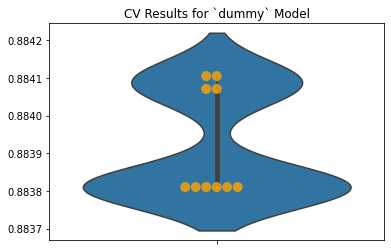

In [62]:
# Create dummy / baseline model

dummy_model = Pipeline([
    ('ct',CT),
    ('dummy',DummyClassifier(strategy='most_frequent'))
])

dummy_model_pipe =  ModelWithCV(dummy_model, model_name='dummy',X=X_train, y=y_train)

# Visualizing results with violin and swarm plot

fig,ax = plt.subplots()
dummy_model_pipe.plot_cv(ax=ax)

dummy_model_pipe.print_cv_summary()

Cross Val score for Dummy Model is about 88%. This is the accuracy we would expect by simply picking the majority class of the target distribution. 

# Logistic Regression

C:\Users\19736\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\19736\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

CV Results for `Logistic Regression` model:
          0.90224 ± 0.00250 accuracy
      


C:\Users\19736\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


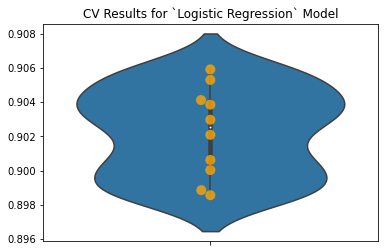

In [63]:
# Create logistic regression model
logreg_fsm = Pipeline([
    ('ct',CT),
    ('logreg_fsm',LogisticRegression(random_state=42))
])

fsm_model_pipe =  ModelWithCV(logreg_fsm, model_name='Logistic Regression',X=X_train, y=y_train)

# Visualizing results with violin and swarm plot
fig,ax = plt.subplots()
fsm_model_pipe.plot_cv(ax=ax)

fsm_model_pipe.print_cv_summary()

Logistic Regression cross val score of 90.22% is an improvement over the dummy model.

In [64]:
# Fit model and get test score
logreg_fsm.fit(X_train, y_train)
logreg_fsm.score(X_test, y_test)

C:\Users\19736\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.898876404494382

Slight overfitting as cv mean accuracy is better than test score accuracy

# Decision Tree

CV Results for `dtc_pipe` model:
          0.87767 ± 0.00440 accuracy
      


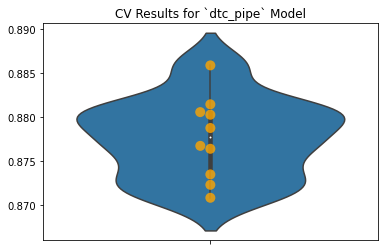

In [65]:
# Create Decision Tree Classifier Model
dtc_model_pipe = Pipeline([('ct', CT), ('dtc', DecisionTreeClassifier(random_state=42))])

dtc_pipe = ModelWithCV(model=dtc_model_pipe,
                          model_name='dtc_pipe',
                          X=X_train,
                          y=y_train)

# Visualizing results with violin and swarm plot

fig, ax = plt.subplots()

dtc_pipe.plot_cv(ax=ax)

dtc_pipe.print_cv_summary()

In [66]:
# Fit model and get test score
dtc_model_pipe.fit(X_train, y_train)
dtc_model_pipe.score(X_test, y_test)

0.8764044943820225

Decision Tree accuracy score is worse than the dummy model.

# Random Forest

CV Results for `forest_pipe` model:
          0.90575 ± 0.00269 accuracy
      


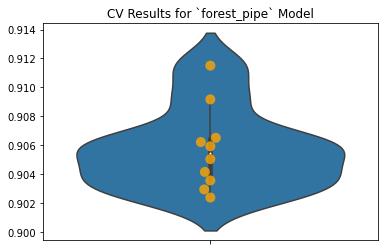

In [67]:
# Create Random Forest Model

rfc_model_pipe = Pipeline([('ct', CT), ('rfc', RandomForestClassifier(random_state=42))])

forest_pipe = ModelWithCV(model=rfc_model_pipe,
                          model_name='forest_pipe',
                          X=X_train,
                          y=y_train)

# Visualizing results with violin and swarm plot
fig, ax = plt.subplots()

forest_pipe.plot_cv(ax=ax);

forest_pipe.print_cv_summary()

Random Forest cross val score of 90.56 % is better than dummy and logistic regression scores. 

In [68]:
# Fit model and get test score
rfc_model_pipe.fit(X_train, y_train)
rfc_model_pipe.score(X_test, y_test)

0.9034769530213218

Slight overfitting

# Gradient Boost

CV Results for `gbc_pipe` model:
          0.90610 ± 0.00383 accuracy
      


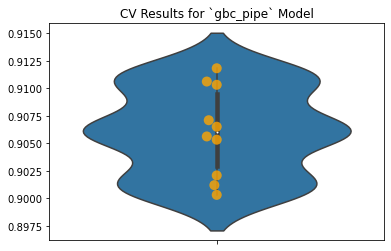

In [69]:
# Create Gradient Boosting Classifier Model
gbc_model_pipe = Pipeline([('ct', CT), ('gbc', GradientBoostingClassifier(random_state=42))])

gbc_pipe = ModelWithCV(model=gbc_model_pipe,
                          model_name='gbc_pipe',
                          X=X_train,
                          y=y_train)

# Visualizing results with violin and swarm plot

fig, ax = plt.subplots()

gbc_pipe.plot_cv(ax=ax)

gbc_pipe.print_cv_summary()

Gradient Boost cross val score of 90.61% is the best accuracy score yet.

In [70]:
# Fit model and get test score
gbc_model_pipe.fit(X_train, y_train)
gbc_model_pipe.score(X_test, y_test)


0.9018844554543042

Test score accuracy of 90.19% indicates slight overfitting.

# Model Tuning

I will attempt to fine-tune and improve the scores of the models using the resampling technique, SMOTE, as well as hyperparameter tuning via grid search. Term Deposit subscription rate of 11.70% implies a class imbalance for the target variable, which could introduce bias into a predicitve model. SMOTE is a technique that oversamples the minority class and attempts to account for the class imbalance.

# SMOTE Logistic Regression

Term Deposit subscription rate of 11.70% implies a class imbalance for the target variable, which could introduce bias into a predicitve model. I will now introduce SMOTE, a technique that oversamples the minority class, to account for the class imbalance.

In [71]:
#Creating new IMBPipeline to include Smote for Logistic Regression Model
imb_pipe_logreg= ImPipeline(steps=[
    ('ct',CT),
    ('sm',SMOTE(random_state=42)),
    ('logreg_fsm',LogisticRegression(random_state=42)),
])

In [72]:
# fit model on train data
imb_pipe_logreg.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_trans',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['job', 'marital',
                                                   'educa

In [73]:
# train score accuracy
imb_pipe_logreg.score(X_train, y_train)

0.8469977586410287

In [74]:
# test score accuracy
imb_pipe_logreg.score(X_test, y_test)

0.8457046801734053

SMOTE resulted in an accuracy score that is worse than original logistic regression as well as dummy models.

# SMOTE Decision Tree

In [75]:
#Creating new IMBPipeline to include Smote for Decision Tree Model
imb_pipe_dtc= ImPipeline(steps=[
    ('ct',CT),
    ('sm',SMOTE(random_state=42)),
    ('dtc', DecisionTreeClassifier(random_state=42)),
])

In [76]:
# fit model on train data
imb_pipe_dtc.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_trans',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['job', 'marital',
                                                   'educa

In [77]:
# train score accuracy
imb_pipe_dtc.score(X_train, y_train)

1.0

In [78]:
# test score accuracy
imb_pipe_dtc.score(X_test, y_test)

0.8702114482880651

SMOTE did not improve the accuracy score of the Decision Tree model.

# SMOTE Random Forest

In [79]:
#Creating new IMBPipeline to include Smote for Random Forest Model
imb_pipe_rfc= ImPipeline(steps=[
    ('ct',CT),
    ('sm',SMOTE(random_state=42)),
    ('rfc', RandomForestClassifier(random_state=42)),
])

In [80]:
# fit model on train data
imb_pipe_rfc.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_trans',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['job', 'marital',
                                                   'educa

In [81]:
# train score accuracy
imb_pipe_rfc.score(X_train, y_train)

1.0

In [82]:
# test score accuracy
imb_pipe_rfc.score(X_test, y_test)

0.897549323188534

SMOTE did not improve the accuracy score of the Decision Tree model.

# SMOTE Gradient Boost

In [83]:
#Creating new IMBPipeline to include Smote for Gradient Boost Model
imb_pipe_gbc= ImPipeline(steps=[
    ('ct',CT),
    ('sm',SMOTE(random_state=42)),
    ('gbc', GradientBoostingClassifier(random_state=42)),
])

In [84]:
# fit model on train data
imb_pipe_gbc.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_trans',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['job', 'marital',
                                                   'educa

In [85]:
# train score accuracy
imb_pipe_gbc.score(X_train, y_train)

0.8845110298454641

In [86]:
# test score accuracy
imb_pipe_gbc.score(X_test, y_test)

0.8808280987348491

SMOTE did not improve the accuracy score of the Gradient Boost model.

# Grid Search / Hyperparameter Tuning

The models with the greatest accuracy scores are the Random Forest and Gradient Boost. I will use grid search to fine tune and see if improvements can be achieved. 

# Grid Search Random Forest

In [87]:
# Hyperparameter tuning Random Forest Classifier
parameters = {'rfc__criterion': ['gini', 'entropy'],
          'rfc__min_samples_leaf': [1, 5, 10]}

gs_rfc = GridSearchCV(estimator=rfc_model_pipe,
                 param_grid=parameters,
                 cv=10, verbose=1)

In [88]:
# fit model on train data ; commenting out for efficiency / avoid long run time
#gs_rfc.fit(X_train, y_train)

In [89]:
# finding the best parameters ; commented out for efficiency 
#gs_rfc.best_params_

In [90]:
# train accuracy score; commented out for efficiency 
#gs_rfc.best_score_

In [91]:
# test accuracy score; commented out for efficiency 
#gs_rfc.best_estimator_.score(X_test, y_test)

In [92]:
# Best parameters discovered throuhg grid search for RFC:
rfc_best_param = ImPipeline(steps=[
    ('ct', CT),
    ('rfc_best',RandomForestClassifier(random_state=42, criterion='gini', min_samples_leaf=1))
])

In [93]:
rfc_best_param.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_trans',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['job', 'marital',
                                                   'educa

In [94]:
rfc_best_param.score(X_train, y_train)

1.0

In [95]:
rfc_best_param.score(X_test, y_test)


0.9034769530213218

Grid Search did not reuslt in improved accuracy score over the original Random Forest Model.

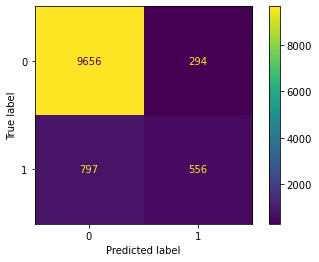

In [96]:
# Plot confusion matrix
plot_confusion_matrix(rfc_best_param, X_test, y_test);

In [97]:
# calculate predictions
y_hat_rfc = rfc_best_param.predict(X_test)

In [98]:
print(f"""
Tuned Random Forest accuracy on the test set is {round(accuracy_score(y_test, y_hat_rfc), 2)}. \n
Tuned Random Forest recall on the test set is {round(recall_score(y_test, y_hat_rfc), 2)} \n
Tuned Random Forest precision on the test set is {round(precision_score(y_test, y_hat_rfc), 2)} \n
Tuned Random Forest f1-score on the test is {round(f1_score(y_test, y_hat_rfc), 2)}.
""")


Tuned Random Forest accuracy on the test set is 0.9. 

Tuned Random Forest recall on the test set is 0.41 

Tuned Random Forest precision on the test set is 0.65 

Tuned Random Forest f1-score on the test is 0.5.



# Grid Search Gradient Boost

In [99]:

# Hyperparameter tuning Gradient Boosting Classifier
parameters = {
    "gbc__n_estimators":[5,50,250,500],
    "gbc__max_depth":[1,3,5,7,9],
    "gbc__criterion":['friedman_mse', 'squared_error'],
    "gbc__learning_rate":[0.01,0.1,1,10,100]
}

gs_gbc = GridSearchCV(estimator=gbc_model_pipe,
                         param_grid=parameters,
                         cv=5,
                         verbose=1) 

In [100]:
# fit model on train data; commenting out for efficiency
#gs_gbc.fit(X_train, y_train)

In [101]:
# finding the best parameters
#gs_gbc.best_params_

In [102]:
# Best parameters discovered through grid search for GBC:
gbc_best_param = ImPipeline(steps=[
    ('ct', CT),
    ('gbc_best',GradientBoostingClassifier(random_state = 42, criterion = 'friedman_mse',
                                           learning_rate = 0.1, max_depth = 3, n_estimators = 500)) 
])

In [103]:
# fit on train data
gbc_best_param.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_trans',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['job', 'marital',
                                                   'educa

In [104]:
gbc_best_param.score(X_train, y_train)

0.9285714285714286

Train score of 92.86% is the best accuracy yet.

In [105]:
# Scoring on test data
gbc_best_param.score(X_test, y_test)

0.905511811023622

Test score accuracy of 90.55% is the best score yet, however there is some overfitting.  

# Final Model

In [106]:
# assigning the best model to 'final model'
final_model = gbc_best_param

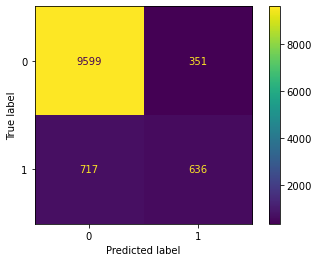

In [107]:
# Plot confusion matrix
plot_confusion_matrix(final_model, X_test, y_test)

In [108]:
# calculate predictions
y_hat = final_model.predict(X_test)

In [109]:
print(f"""
Our final model's accuracy on the test set is {round(accuracy_score(y_test, y_hat), 2)}. \n
Our final model's recall on the test set is {round(recall_score(y_test, y_hat), 2)} \n
Our final model's precision on the test set is {round(precision_score(y_test, y_hat), 2)} \n
Our final model's f1-score on the test is {round(f1_score(y_test, y_hat), 2)}.
""")


Our final model's accuracy on the test set is 0.91. 

Our final model's recall on the test set is 0.47 

Our final model's precision on the test set is 0.64 

Our final model's f1-score on the test is 0.54.



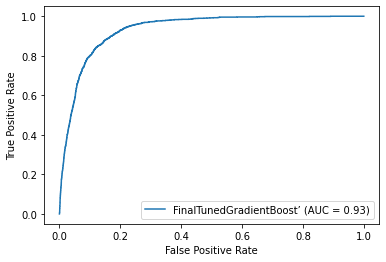

In [110]:
# PLot ROC Curve and look at AUC Score
# AUC scores is a measurement of the ratio of the rate of True Positive to False postive, with a higher score being better.

fig, ax = plt.subplots()



plot_roc_curve(final_model, X_test, y_test, ax=ax, name='FinalTunedGradientBoost’')